In [1]:
#!pip install --quiet plotly

In [25]:
import pandas as pd
import numpy as np 
import seaborn as sns 
import plotly.express as px
import plotly.graph_objects as go
import matplotlib.pyplot as plt

In [26]:
df = pd.read_csv('../raw_data/data_clean.csv')

In [134]:
dh = pd.read_csv('../raw_data/data_final_indé_big.csv')

In [149]:
dh

,steam_appid,name,top_5_tags,topic_0,topic_1,topic_2,topic_3,topic_4,topic_5,topic_6,...,english,price,has_a_website,nb_review,owner_estimated,rating,popularity,score_descriptif,average_playtime,median_playtime
0,1002,Rag Doll Kung Fu,fighting multiplayer 1980s realistic real_time...,0.016212,0.016212,0.016212,0.016212,0.401611,0.016212,0.016212,...,1,5.99,1,57,22451.0,29.800000,45.100000,9,0,0
1,2710,Act of War: Direct Action,action strategy rts 1980s relaxing,0.016444,0.016444,0.016444,0.016444,0.016444,0.016444,0.016444,...,1,1.99,0,213,29159.0,1522.087755,1924.966327,4,0,0
2,2720,ThreadSpace: Hyperbol,action strategy space 1980s relaxing,0.016197,0.016197,0.016197,0.016197,0.016197,0.016197,0.016197,...,1,3.99,1,40,21720.0,225.287500,276.278125,9,0,0
3,2780,ARMA: Combat Operations,action simulation shooter fps tactical,0.016200,0.016200,0.016200,0.016200,0.431614,0.016200,0.016200,...,1,5.99,1,222,29546.0,10759.884348,15763.549130,8,0,0
4,2850,X: Tension,simulation strategy space sci_fi space_sim,0.016250,0.016250,0.016250,0.016250,0.016250,0.016250,0.016250,...,1,3.49,1,75,23225.0,629.000000,1339.437500,6,13,13
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21542,1065230,Room of Pandora,adventure casual puzzle 1980s relaxing,0.015694,0.701810,0.015694,0.015694,0.015694,0.015694,0.015694,...,1,2.09,0,3,624.0,3.000000,3.000000,1,0,0
21543,1065570,Cyber Gun,action adventure fps 3d_platformer fast_paced,0.016478,0.016478,0.519926,0.016478,0.183470,0.016478,0.016478,...,1,1.69,0,9,1872.0,13.366667,16.816667,3,0,0
21544,1065650,Super Star Blast,action casual 1980s relaxing realistic,0.015483,0.015483,0.015483,0.015483,0.015483,0.015483,0.015483,...,1,3.99,1,1,208.0,4.600000,10.450000,5,0,0
21545,1066700,New Yankee 7: Deer Hunters,casual adventure 1980s relaxing realistic,0.015466,0.015466,0.015466,0.015466,0.015466,0.015466,0.015466,...,1,5.19,1,2,416.0,23.463964,29.301802,2,0,0


In [103]:
df.columns[:20]

Index(['steam_appid', 'name', 'release_date', 'english', 'developer',
       'publisher', 'platforms', 'categories', 'genres', 'steamspy_tags',
       'achievements', 'owners', 'price', 'detailed_description',
       'about_the_game', 'short_description', 'header_image', 'screenshots',
       'background', 'website'],
      dtype='object')

In [146]:
df[['name','short_description','developer','publisher','steamspy_tags']][2600:2650]

,name,short_description,developer,publisher,steamspy_tags
2600,Clockwork Tales: Of Glass and Ink,Unburied secrets burn like wild steam – nothin...,Artifex Mundi,Artifex Mundi,"['Hidden Object', 'Adventure', 'Casual']"
2601,Grim Legends: The Forsaken Bride,Enter an enchanting world of legends and magic...,Artifex Mundi,Artifex Mundi,"['Hidden Object', 'Point & Click', 'Casual']"
2602,9 Clues: The Secret of Serpent Creek,Save your missing friend and reveal the corrup...,Tap It Games,Artifex Mundi,"['Hidden Object', 'Adventure', 'Casual']"
2603,Left in the Dark: No One on Board,Discover what connects a lost ship’s disappear...,Moonrise Interactive,Artifex Mundi,"['Hidden Object', 'Adventure', 'Casual']"
2604,Purgatory: War of the Damned,"Purgatory is a magical, fantasy based multipla...",Ironsun Studios,KISS ltd,"['Early Access', 'RPG', 'Action']"
2605,Speed Kills,"Action-packed death racing, this is what Speed...",Holy Warp;Black Wing Foundation,KISS ltd,"['Racing', 'Action', 'Indie']"
2606,Pixel Puzzles: Japan,Pixel Puzzles: Japan combines traditional jigs...,DL Softworks,DL Softworks,"['Puzzle', 'Casual', 'Indie']"
2607,Project Root,Project Root the Shoot’em up Evolution.Project...,OPQAM,Reverb Triple XP,"['Action', 'Indie', ""Shoot 'Em Up""]"
2608,Solarix,Solarix is a science-fiction stealth/horror ga...,Pulsetense Games,KISS ltd,"['Action', 'Stealth', 'Indie']"
2609,Pixel Puzzles: UndeadZ,Pixel Puzzles: UndeadZ is a traditional style ...,DL Softworks,DL Softworks,"['Casual', 'Indie', 'Puzzle']"


In [104]:
df2 = df[['release_date', 'english', 'developer',
       'publisher', 'platforms', 'categories', 'genres', 'steamspy_tags','owner_median', 'owner_lower', 'owner_upper', 'revenue',
       'has_a_website','genres' ,'price']]

In [140]:
df2

,release_date,english,developer,publisher,platforms,categories,genres,steamspy_tags,owner_median,owner_lower,owner_upper,revenue,has_a_website,genres,price
0,2000-11-01,1,Valve,Valve,windows;mac;linux,"['Multi-player', 'Online Multi-Player', 'Local...",['Action'],"['Action', 'FPS', 'Multiplayer']",15000000.0,10000000,20000000,107850000.0,0,['Action'],7.19
1,2003-05-01,1,Valve,Valve,windows;mac;linux,"['Multi-player', 'Valve Anti-Cheat enabled']",['Action'],"['FPS', 'World War II', 'Multiplayer']",7500000.0,5000000,10000000,29925000.0,1,['Action'],3.99
2,1999-11-01,1,Gearbox Software,Valve,windows;mac;linux,"['Single-player', 'Multi-player', 'Valve Anti-...",['Action'],"['FPS', 'Action', 'Sci-fi']",7500000.0,5000000,10000000,29925000.0,0,['Action'],3.99
3,1998-11-08,1,Valve,Valve,windows;mac;linux,"['Single-player', 'Multi-player', 'Online Mult...",['Action'],"['FPS', 'Classic', 'Action']",7500000.0,5000000,10000000,53925000.0,1,['Action'],7.19
4,2004-03-01,1,Valve,Valve,windows;mac;linux,"['Single-player', 'Multi-player', 'Valve Anti-...",['Action'],"['Action', 'FPS', 'Multiplayer']",15000000.0,10000000,20000000,107850000.0,0,['Action'],7.19
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26862,2019-04-24,1,SHEN JIAWEI,SHEN JIAWEI,windows,"['Single-player', 'Steam Achievements']","['Adventure', 'Casual', 'Indie']","['Adventure', 'Indie', 'Casual']",10000.0,0,20000,20900.0,0,"['Adventure', 'Casual', 'Indie']",2.09
26863,2019-04-23,1,Semyon Maximov,BekkerDev Studio,windows,['Single-player'],"['Action', 'Adventure', 'Indie']","['Action', 'Indie', 'Adventure']",10000.0,0,20000,16900.0,0,"['Action', 'Adventure', 'Indie']",1.69
26864,2019-04-24,1,EntwicklerX,EntwicklerX,windows,"['Single-player', 'Multi-player', 'Co-op', 'Sh...","['Action', 'Casual', 'Indie']","['Action', 'Indie', 'Casual']",10000.0,0,20000,39900.0,1,"['Action', 'Casual', 'Indie']",3.99
26865,2019-04-17,1,Yustas Game Studio,Alawar Entertainment,windows;mac,"['Single-player', 'Steam Cloud']","['Adventure', 'Casual', 'Indie']","['Indie', 'Casual', 'Adventure']",10000.0,0,20000,51900.0,1,"['Adventure', 'Casual', 'Indie']",5.19


In [30]:
top_10 = df.head(10).sort_values(by='revenue', ascending=False)

In [111]:
dg = pd.read_csv('../raw_data/data_final_indé_big.csv')

In [117]:
dg.head(10)

0        9
1        4
2        9
3        8
4        6
        ..
21542    1
21543    3
21544    5
21545    2
21546    3
Name: score_descriptif, Length: 21547, dtype: int64

# Distribution des différentes données 

In [33]:
top_av_ = dg.head(10).sort_values(by='average_playtime', ascending=False)

## Top 10 des jeux sur lesquels les joueurs passent le plus de temps en moyenne

<Figure size 2000x1400 with 0 Axes>

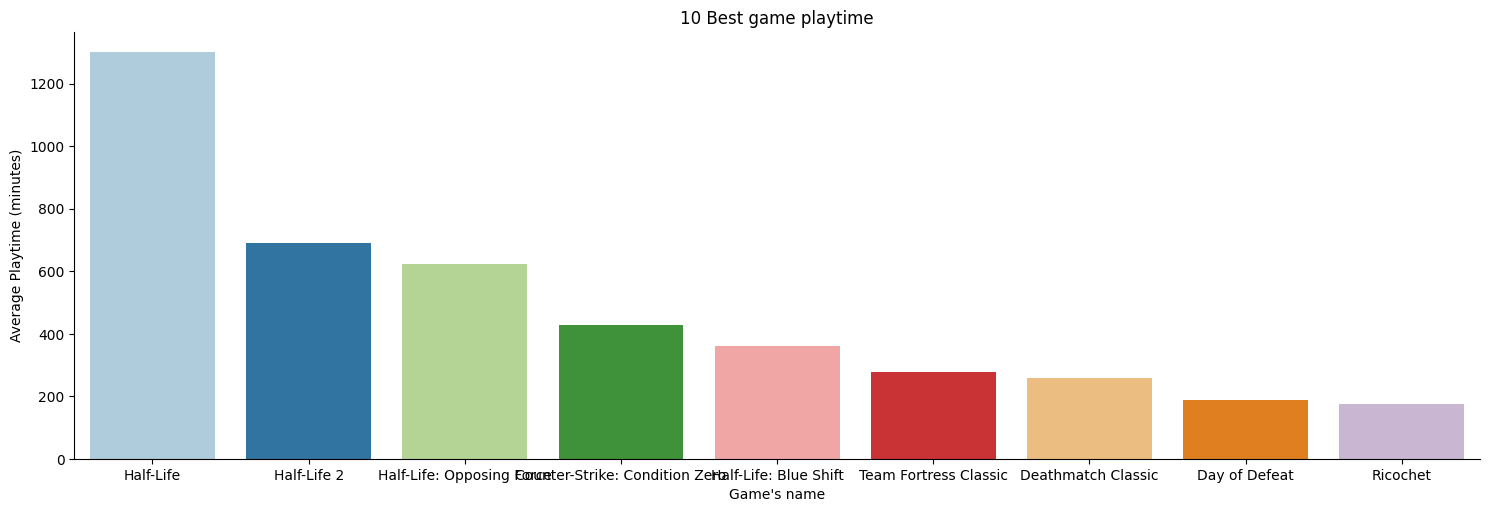

In [90]:
# Set the figure size
plt.figure(figsize=(20, 14))
plt.style.use('default')
plt.rcParams['font.size'] = 10
# Set_color
palette = sns.color_palette('Paired', 10)
plt.rcParams['lines.linewidth'] = 2
plt.rcParams['lines.color'] = 'r'

# plot a bar chart
sns.catplot(x="name", y='average_playtime',kind="bar", palette=palette, data=top_av_[1:], height=5, aspect=3);
sns.despine()
plt.title('10 Best game playtime')
plt.xlabel("Game's name")
plt.ylabel("Average Playtime (minutes)")
plt.show()

In [36]:
pub_tmp = dg['publisher'].value_counts().reset_index()

In [37]:
pub = pd.DataFrame(pub_tmp)

In [38]:
top_pb = pub.head(10)

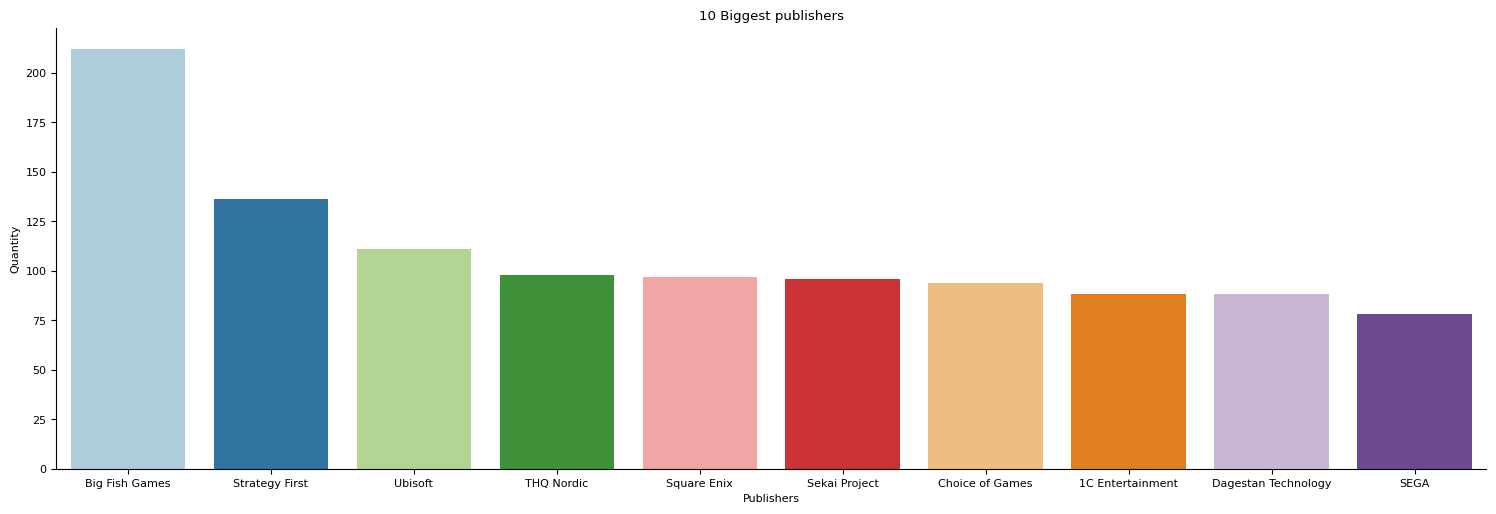

In [73]:
sns.catplot(x="index", y='publisher',kind="bar", palette=palette, data=top_pb, height=5, aspect=3);
sns.despine()
plt.title('10 Biggest publishers')
plt.xlabel("Publishers")
plt.ylabel("Quantity")
plt.show()

In [17]:
df.revenue = df.revenue.astype(int)

In [18]:
df['name'] = df['name'].apply(lambda x: x.strip())


In [19]:
import random

def name_to_color(names, r_min=0, r_max=255, g_min=0, g_max=255, b_min=0, b_max=255):
    """Mapping of names to random rgb colors.
    Parameters:
    df (Series): Pandas Series containing names.
    r_min (int): Mininum intensity of the red channel (default 0).
    r_max (int): Maximum intensity of the red channel (default 255).
    g_min (int): Mininum intensity of the green channel (default 0).
    g_max (int): Maximum intensity of the green channel (default 255).
    b_min (int): Mininum intensity of the blue channel (default 0).
    b_max (int): Maximum intensity of the blue channel (default 255).
    Returns:
    dictionary: Mapping of names (keys) to random rgb colors (values)
    """
    mapping_colors = dict()
    
    for name in names.unique():
        red = random.randint(r_min, r_max)
        green = random.randint(g_min, g_max)
        blue = random.randint(b_min, b_max)
        rgb_string = 'rgb({}, {}, {})'.format(red, green, blue)
    
        mapping_colors[name] = rgb_string
    
    return mapping_colors

In [20]:
mapping_colors_game = name_to_color(df.name, 125, 255, 0, 185, 0, 185)


In [21]:
df['Color'] = df['name'].map(mapping_colors_game)


In [22]:
def frames_animation(df, title):
    """Creation of a sequence of frames.
    Parameters:
    df (DataFrame): Pandas data frame containing the categorical variable ['Name'],
    the count ['Number'], the year ['Year'], and the color['Color'] (separated columns).
    title (string): Title of each frame.
    Returns:
    list_of_frames (list): List of frames. Each frame contains a bar plot of a year.
    """
    
    list_of_frames = []
    initial_revenue = df['revenue'].min()
    final_revenue = df['revenue'].max()

    for revenue in range(initial_revenue, final_revenue):
            fdata = df[df['revenue'] == revenue]
            list_of_frames.append(go.Frame(data=[go.Bar(x=fdata['name'], y=fdata['revenue'],
                                                        marker_color=fdata['Color'], hoverinfo='none',
                                                        textposition='outside', texttemplate='%{x}<br>%{y}',
                                                        cliponaxis=False)],
                                           layout=go.Layout(font={'size': 14},
                                                            plot_bgcolor = '#FFFFFF',
                                                            xaxis={'showline': False, 'visible': False},
                                                            yaxis={'showline': False, 'visible': False},
                                                            bargap=0.15,
                                                            title=title + str(revenue))))
    return list_of_frames 

In [23]:
def bar_race_plot (df, title, list_of_frames):
    """Creation of the bar chart race figure.
    Parameters:
    df (DataFrame): Pandas data frame containing the categorical variable ['Name'],
    the count ['Number'], the year ['Year'], and the color ['Color'] (separated columns).
    title (string): Title of the initial bar plot.
    list_of_frames (list): List of frames. Each frame contains a bar plot of a year.
    Returns:
    fig (figure instance): Bar chart race
    """
    
    # initial year - names (categorical variable), number of babies (numerical variable), and color
    initial_revenue = df['revenue'].min()
    initial_revenue = df[df['revenue'] == initial_revenue].name
    initial_revenue = df[df['revenue'] == initial_revenue].revenue
    initial_color = df[df['name'] == initial_revenue].Color
    range_max = df['revenue'].max()
    
    fig = go.Figure(
        data=[go.Bar(x=initial_names, y=initial_numbers,
                       marker_color=initial_color, hoverinfo='none',
                       textposition='outside', texttemplate='%{x}<br>%{y}',
                       cliponaxis=False)],
        layout=go.Layout(font={'size': 14}, plot_bgcolor = '#FFFFFF',
                         xaxis={'showline': False, 'visible': False},
                         yaxis={'showline': False, 'visible': False, 'range': (0, range_max)},
                         bargap=0.15, title=title + str(initial_revenue),
                         updatemenus=[dict(type="buttons",
                                           buttons=[dict(label="Play",
                                                         method="animate",
                                                         args=[None,{"frame": {"duration": 2000, "redraw": True}, "fromcurrent": True}]),
                                                    dict(label="Stop",
                                                         method="animate",
                                                         args=[[None],{"frame": {"duration": 0, "redraw": False}, "mode": "immediate","transition": {"duration": 0}}])])]),
        frames=list(list_of_frames))
    
    return fig

In [24]:
title = 'Most popular games names of '
list_of_frames = frames_animation(df, title)
fig = bar_race_plot(df_name, title, list_of_frames)
fig.show()

KeyboardInterrupt: 

# Viz 1 

In [46]:
dg.columns


Index(['appid', 'name', 'release_date', 'english', 'developer', 'publisher',
       'platforms', 'required_age', 'categories', 'genres', 'steamspy_tags',
       'achievements', 'positive_ratings', 'negative_ratings',
       'average_playtime', 'median_playtime', 'owners', 'price'],
      dtype='object')

In [48]:
dg[['positive_ratings', 'negative_ratings']]

,positive_ratings,negative_ratings
0,124534,3339
1,3318,633
2,3416,398
3,1273,267
4,5250,288
...,...,...
27070,3,0
27071,8,1
27072,0,1
27073,2,0


In [57]:

ratio = dg['positive_ratings']/(dg["positive_ratings"] + dg["negative_ratings"])
dg["ratio"] = round(ratio,2)



In [67]:
ratio = dg.sort_values(by='ratio',ascending=False)

# Viz 2

In [74]:
import datetime
df['release_date'] = pd.to_datetime(df['release_date'])

In [75]:
dates = pd.DataFrame(df['release_date'].dt.year.value_counts().reset_index())

In [76]:
dates = dates.drop(dates[dates['index']==2019].index)

In [77]:
dates = dates.drop(dates[dates['index']<2003].index)

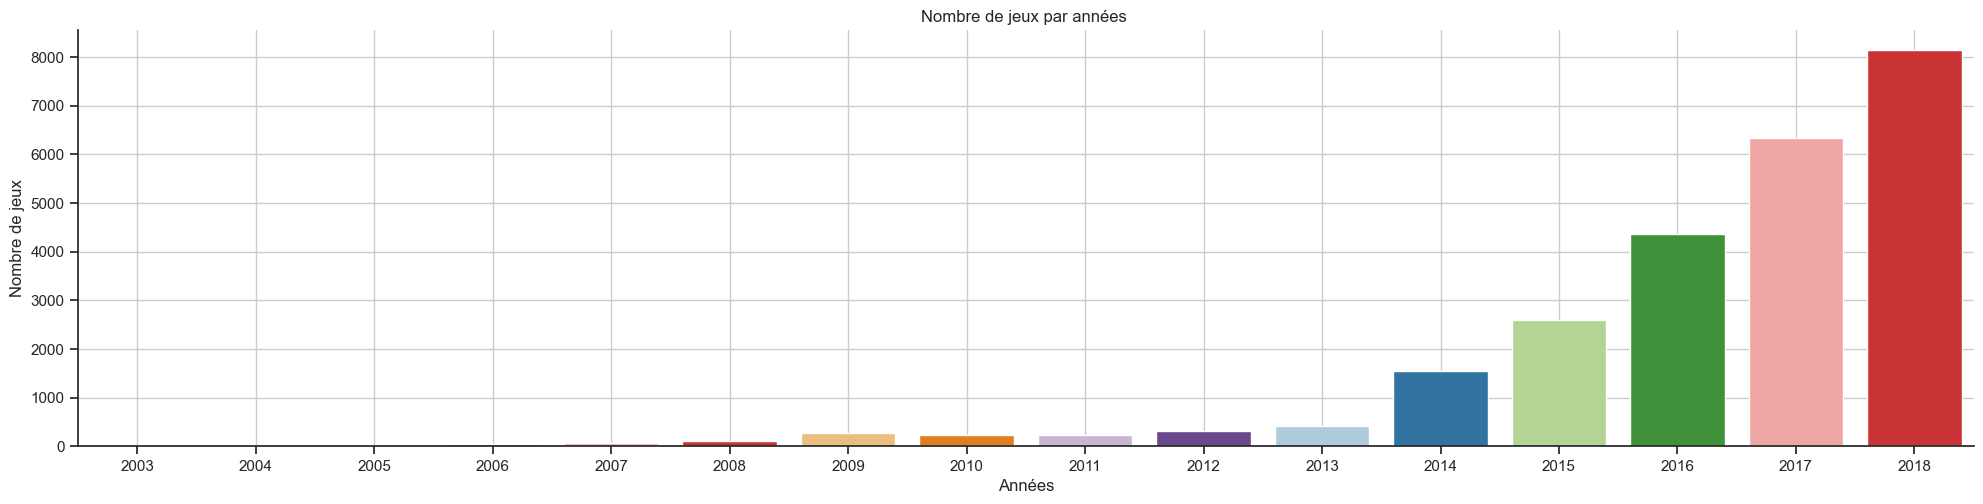

In [81]:
# Remove periode avant la création de steam (2003) et année 2019 car on a que la moitié de l'année


sns.catplot(x="index", y='release_date',kind="bar", palette=palette, data=dates, height=5, aspect=4);
sns.despine()
plt.title('Nombre de jeux par années ')
plt.xlabel("Années")
plt.ylabel("Nombre de jeux")
sns.set(style="ticks")
plt.grid()
plt.show()

In [83]:
dates

,index,release_date
0,2018,8146
1,2017,6341
2,2016,4356
3,2015,2590
5,2014,1554
6,2013,414
7,2012,306
8,2009,266
9,2011,233
10,2010,222


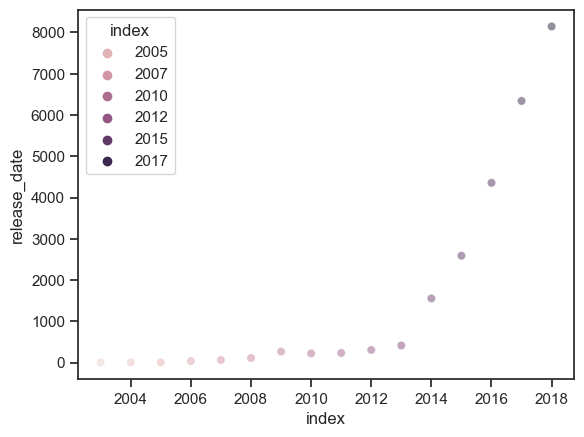

In [89]:
sns.scatterplot(data=dates, x="index", y="release_date", hue="index", alpha=0.5, sizes=(200, 4000))

# show the graph
plt.show()


In [99]:
dg.corr().style.background_gradient(cmap='coolwarm', text_color_threshold=0.700)

,appid,english,required_age,achievements,positive_ratings,negative_ratings,average_playtime,median_playtime,price,ratio
appid,1.000000,-0.116878,-0.087740,0.040510,-0.070888,-0.052198,-0.070236,-0.048308,-0.152112,-0.021908
english,-0.116878,1.000000,0.002860,0.014121,0.006001,0.005705,0.000338,-0.003416,0.007716,-0.017604
required_age,-0.087740,0.002860,1.000000,-0.005459,0.060418,0.057599,0.034423,0.014748,0.120358,0.010169
achievements,0.040510,0.014121,-0.005459,1.000000,0.006058,0.003578,0.014175,0.009957,-0.007996,-0.022506
positive_ratings,-0.070888,0.006001,0.060418,0.006058,1.000000,0.762804,0.157898,0.035776,0.036110,0.030300
negative_ratings,-0.052198,0.005705,0.057599,0.003578,0.762804,1.000000,0.161140,0.047887,0.051259,0.000756
average_playtime,-0.070236,0.000338,0.034423,0.014175,0.157898,0.161140,1.000000,0.914900,0.049242,0.020349
median_playtime,-0.048308,-0.003416,0.014748,0.009957,0.035776,0.047887,0.914900,1.000000,0.036610,0.013172
price,-0.152112,0.007716,0.120358,-0.007996,0.036110,0.051259,0.049242,0.036610,1.000000,0.076448
ratio,-0.021908,-0.017604,0.010169,-0.022506,0.030300,0.000756,0.020349,0.013172,0.076448,1.000000


In [105]:
df2.corr().style.background_gradient(cmap='coolwarm', text_color_threshold=0.700)

,english,owner_median,owner_lower,owner_upper,revenue,has_a_website,price
english,1.000000,0.010626,0.010413,0.010721,0.008270,0.057453,0.007839
owner_median,0.010626,1.000000,0.998820,0.999720,0.446645,0.043213,0.033830
owner_lower,0.010413,0.998820,1.000000,0.997390,0.447658,0.042266,0.033080
owner_upper,0.010721,0.999720,0.997390,1.000000,0.445769,0.043637,0.034166
revenue,0.008270,0.446645,0.447658,0.445769,1.000000,0.040049,0.151496
has_a_website,0.057453,0.043213,0.042266,0.043637,0.040049,1.000000,0.193849
price,0.007839,0.033830,0.033080,0.034166,0.151496,0.193849,1.000000


#### Corrélation avec Followers

#### Corrrélation 